# GENERALIZATION

## What is Generalization ?

- In supervised learning, we build model on a dataset (seen data) and then be able to make accurate predictions on new data (unseen data)
- Thus, we need to divide data into two set, training set and test set
- Taining set is used to fit the model and from test set we can infer the ML algorithm performance
- When building any model, test data can’t get involved at all
If a model is able to make accurate predictions on the unseen data, we say it is able to generalize from the training set to the test set

## Why generalization?
- We are interested in the accuracy of the prediction that we obtain when we apply our method to new unseen data
- In practice, We might try several different method
- No one method dominates all others over all possible data set
- We want to build an ML that is able to generalize as accurately as possible

## Underfitting and Overfitting

Underfitting :
- terjadi ketika metode ML yang dibangun masih terlalu sederhana
- tidak menggambarkan data trend yg mendasarinya
- performa jelek pada data training dan data testing
-  high bias, low variance

Overfitting :
- terjadi ketika metode ML yang dibangun terlalu kompleks
- terlalu cocok dengan data training
- performa bagus pada data training, tapi jelek pada data testing
- high variance, low bias

In [1]:
# Import Libraries

import pandas as pd 
import numpy as np 

import seaborn as sns 
import matplotlib.pyplot as plt 

from sklearn.datasets import load_boston

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression, LinearRegression, Lasso, Ridge

from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error

import warnings
warnings.filterwarnings('ignore')


# DATASET BANKLOAN

In [2]:
bankloan = pd.read_csv('bankloan.csv')
bankloan.head()

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
0,41,3,17,12,176,9.3,11.359392,5.008608,1
1,27,1,10,6,31,17.3,1.362202,4.000798,0
2,40,1,15,14,55,5.5,0.856075,2.168925,0
3,41,1,15,14,120,2.9,2.658720,0.821280,0
4,24,2,2,0,28,17.3,1.787436,3.056564,1


In [3]:
fitur = ['employ','debtinc','creddebt','othdebt']
target = ['default']

X = bankloan[fitur]
y = bankloan[target]

In [4]:
# Splitting data

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    stratify=y,
    test_size=0.2,
    random_state=2020
)

In [5]:
# Normalize Data

scaler = MinMaxScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Seletion Process of Factor K

In [6]:
# Mencari nilai k terbaik
# Gunakan X yg sudah discaling/dinormalize untuk KNN

k = range(1,100,2) 
testing_accuracies = []
training_accuracies = []
score = 0

for i in k:
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train_scaled,y_train)

    y_predict_train = knn.predict(X_train_scaled)
    training_accuracies.append(accuracy_score(y_train, y_predict_train))

    y_predict_test = knn.predict(X_test_scaled)
    acc_score = accuracy_score(y_test, y_predict_test)
    testing_accuracies.append(accuracy_score(y_test, y_predict_test))

    if score < acc_score:
        score = acc_score
        best_k = i

<function matplotlib.pyplot.show(*args, **kw)>

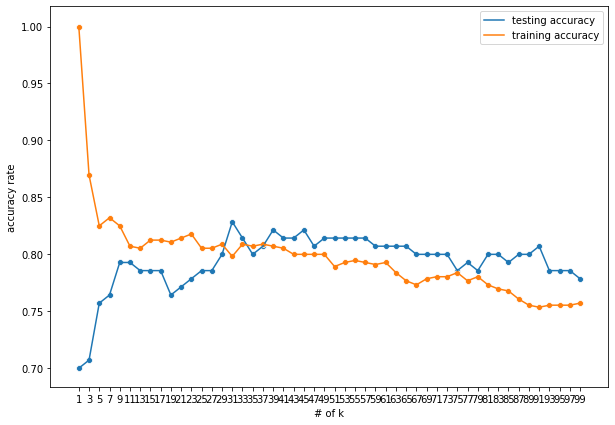

In [7]:
# buat line chart untuk mencari akurasi maksimum di k berapa 

plt.figure(figsize=(10,7))
sns.lineplot(k, testing_accuracies)
sns.scatterplot(k, testing_accuracies)
sns.lineplot(k, training_accuracies)
sns.scatterplot(k, training_accuracies)
plt.legend(['testing accuracy', 'training accuracy'])
plt.xlabel('# of k')
plt.ylabel('accuracy rate')
plt.xticks(list(k))
plt.show

In [8]:
print('n_neighbors terbaik:', best_k)
print('accuration score pada best_k:', score)

n_neighbors terbaik: 31
accuration score pada best_k: 0.8285714285714286


## Interpretasi

di k=1, KNN method mencapai akurasi 100 pada training data, tapi akurasi testnya (validation accuracy) sangat buruk, ini overfitting.

- overfitting: di k sekitar <31
akurasi train bagus, tapi akurasi test jelek

- underfitting: di k sekitar >31
akurasi train dan test makin jelek (grafik menurun)

- just right : di k 31

# Model Complexity: Decision Tree

## Selection Process of Maximum Depth

In [9]:
depths = range(1,25)
testing_accuracies = []
training_accuracies = []
score = 0

for i in depths:
    tree = DecisionTreeClassifier(
        criterion = 'entropy',
        max_depth = i)
    tree.fit(X_train,y_train)

    y_predict_train = tree.predict(X_train)
    training_accuracies.append(accuracy_score(y_train,y_predict_train))

    y_predict_test = tree.predict(X_test)
    acc_score = accuracy_score(y_test,y_predict_test)
    testing_accuracies.append(acc_score)

    if score < acc_score:
        best_depth = i
        score = acc_score


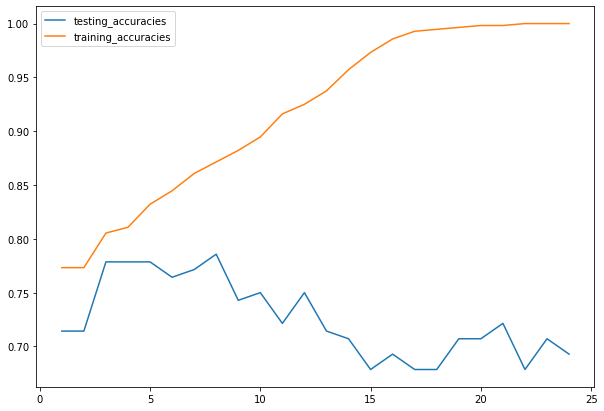

In [10]:
plt.figure(figsize=(10,7))
sns.lineplot(depths, testing_accuracies)
sns.lineplot(depths, training_accuracies)
plt.legend(['testing_accuracies','training_accuracies'])
plt.show()

In [11]:
print('best maximum depth:',best_depth)
print('accuracy score:',score)

best maximum depth: 8
accuracy score: 0.7857142857142857


### Interpretasi

-  maximum depth terbaik di 8, dgn akurasi 0.78%
- makin dalam/depth tree, ML method makin overfitting
- di depth 25, akurasi training 100%. datanya udah ga bisa dibagi lagi di depth sekitar 25.

# Exercise : Try different value of 
- minimum samples split or 
- minimum samples leaf


In [12]:
min_samples_split = range(2,200)
testing_accuracies = []
training_accuracies = []
score = 0

for i in min_samples_split:
    tree = DecisionTreeClassifier(
        criterion = 'entropy',
        min_samples_split = i)
    
    tree.fit(X_train,y_train)

    y_predict_train = tree.predict(X_train)
    training_accuracies.append(accuracy_score(y_train,y_predict_train))

    y_predict_test = tree.predict(X_test)
    acc_score = accuracy_score(y_test,y_predict_test)
    testing_accuracies.append(acc_score)

    if score < acc_score:
        best_min_samples_split = i
        score = acc_score


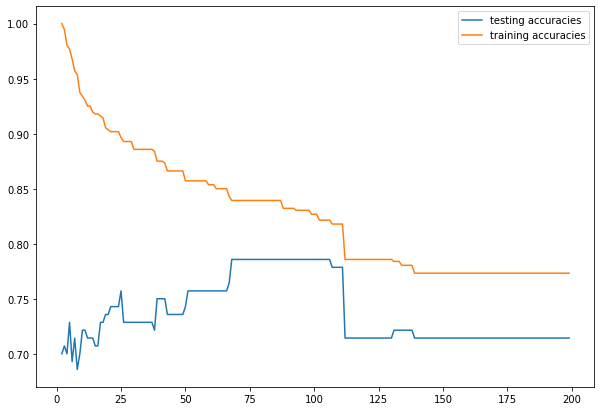

In [13]:

plt.figure(figsize=(10,7))
sns.lineplot(min_samples_split,testing_accuracies)
sns.lineplot(min_samples_split,training_accuracies)
plt.legend(['testing accuracies','training accuracies'])

In [14]:
print('best min_samples_split:',best_min_samples_split)
print('accuracy score:',score)

best min_samples_split: 68
accuracy score: 0.7857142857142857


In [15]:
min_samples_leaf = range(1,200)
testing_accuracies = []
training_accuracies = []
score = 0

for i in min_samples_leaf:
    tree = DecisionTreeClassifier(
        criterion = 'entropy',
        min_samples_leaf= i)
    
    tree.fit(X_train,y_train)

    y_predict_train = tree.predict(X_train)
    training_accuracies.append(accuracy_score(y_train,y_predict_train))

    y_predict_test = tree.predict(X_test)
    acc_score = accuracy_score(y_test,y_predict_test)
    testing_accuracies.append(acc_score)

    if score < acc_score:
        best_min_samples_leaf = i
        score = acc_score


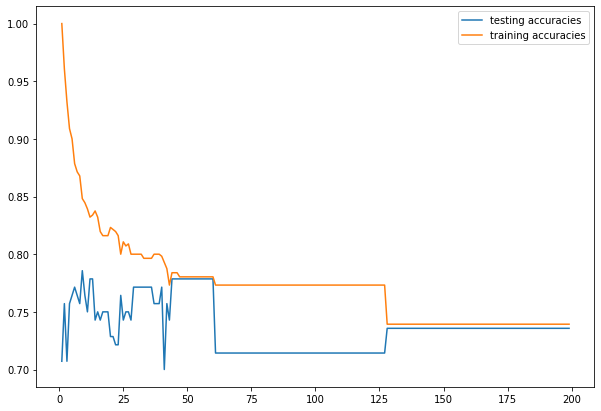

In [16]:
plt.figure(figsize=(10,7))
sns.lineplot(min_samples_leaf,testing_accuracies)
sns.lineplot(min_samples_leaf,training_accuracies)
plt.legend(['testing accuracies','training accuracies'])

In [17]:
print('best min_samples_leaf:',best_min_samples_leaf)
print('accuracy score:',score)

best min_samples_leaf: 9
accuracy score: 0.7857142857142857



- max_depth : banyak level

- min_samples_split : 

- min_samples_leaf : selama data masih lebih besar dari angka min_samples_leaf, maka akan terus dibagi 

# Model Complexity : Linear Model Regression

- ridge
- lasso

- Too many feature used in linear models makes model more complex and may leads to overfitting

- We can either use :
    - reduce the effect/magnitude of certain features (Ridge)
    - make zero effect/magnitude for certain features (Lasso)

- Ridge or Lasso can be used as a solution to multicollinearity
- Which one to use ?
    - as the simplest way, you can directly check the performance on test data

In [18]:
boston = load_boston()

In [19]:
boston

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [20]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [21]:
print(boston['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [22]:
# buat dataframe

X = pd.DataFrame(data=boston['data'], columns=boston['feature_names'])
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [23]:
y = pd.Series(boston['target'])
y.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
dtype: float64

In [24]:
# Splitting data 
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    test_size = 0.2,
    random_state = 1899
)

# stratify untuk kelas, jadi ga perlu stratify untuk linear model

# Ridge Regression

Dalam teknik ridge ada suatu besaran yang perlu kita pilih nilainya, yakni nilai alpha. Meningkatnya nilai alpha membuat nilai estimasi koefisien regresi mendekati nol serta menyebabkan kompleksitas model menurun.

- makin besar alpha, model makin simple



In [25]:
hyperparam_c = [100000, 10000, 1000, 100, 10, 1, 0.1, 0.01, 0.001]
testing_mse = []
training_mse = []
score = 0

for i in range(len(hyperparam_c)):
    ridgereg = Ridge(alpha= hyperparam_c[i])
    ridgereg.fit(X_train, y_train)

    y_predict_train = ridgereg.predict(X_train)
    training_mse.append(mean_squared_error(y_train, y_predict_train))

    y_predict_test = ridgereg.predict(X_test)
    mse_score = mean_squared_error(y_test, y_predict_test)
    testing_mse.append(mse_score)

    if i==0:
        score = mse_score
        best_c = hyperparam_c[i]

    if score > mse_score:
        score = mse_score
        best_c =hyperparam_c[i]

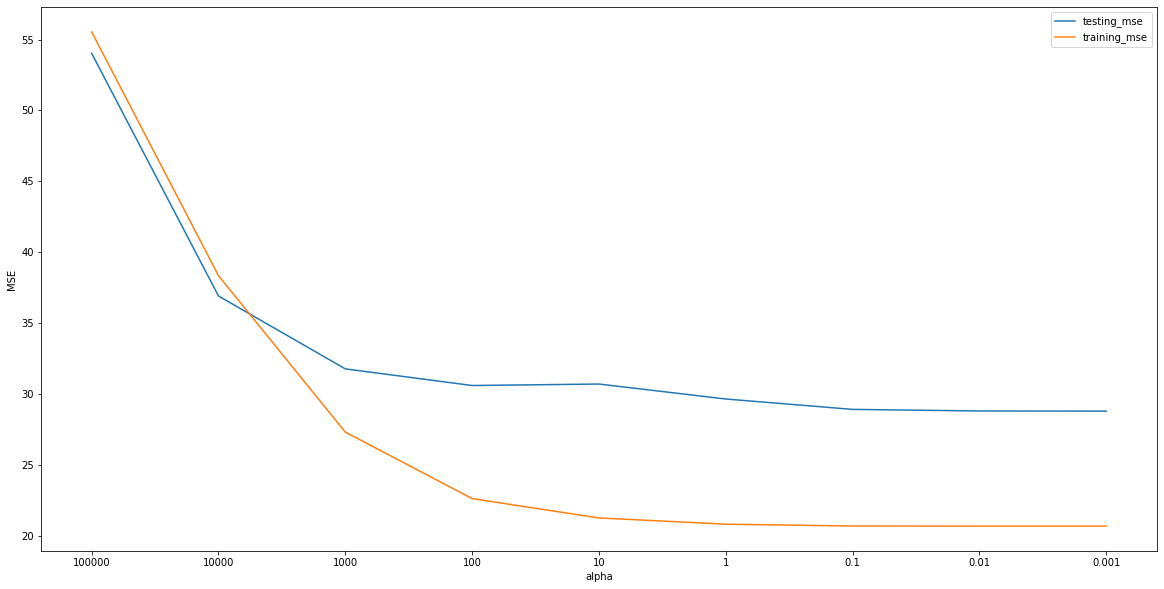

In [26]:
length = range(len(hyperparam_c))

plt.figure(figsize=(20,10))
sns.lineplot(length, testing_mse)
sns.lineplot(length, training_mse)
plt.legend(['testing_mse','training_mse'])
plt.xlabel('alpha')
plt.ylabel('MSE')
plt.xticks(length, hyperparam_c)
plt.show()

# mse(mean squared error) nilainya makin kecil makin bagus

In [27]:
print('best c:',best_c)
print('mse:', score)

best c: 0.001
mse: 28.77840277805298


In [28]:
ridgereg = Ridge(alpha=best_c)
ridgereg.fit(X_train, y_train)

Ridge(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [29]:
y_reg_train = ridgereg.predict(X_train)
y_reg_test = ridgereg.predict(X_test)


In [30]:
coef_ridgereg = pd.DataFrame({
    'feature_names':list(X),
    'feature coef':ridgereg.coef_.flatten()
})

# flatten untuk jadiin dataframe

In [31]:
coef_ridgereg

,feature_names,feature coef
0,CRIM,-0.123098
1,ZN,0.027489
2,INDUS,0.040234
3,CHAS,1.676822
4,NOX,-14.800396
5,RM,4.324093
6,AGE,0.002115
7,DIS,-1.253837
8,RAD,0.328548
9,TAX,-0.014321


In [32]:
print('mse train:', mean_squared_error(y_train, y_reg_train))
print('mse test:', mean_squared_error(y_test, y_reg_test))

mse train: 20.664301374310284
mse test: 28.77840277805298


## MSE: Mean Squared Error
Mean or Average of the square of the difference between actual and estimated values

MSE unit order is higher than the error unit as the error is squared. To get the same unit order, many times the square root of MSE is taken. It is called the Root Mean Squared Error (RMSE).

## Kesimpulan

- saat alphanya diset di high value, modelnya undefitting karena MSE pada training set dan test set nya besar, dan itu juga menunjukkan bahwa modelnya terlalu simple.

- alpha yg lebih rendah dapat mengurangi MSE baik untuk training set maupun test set sampai MSE pada training agak lebih rendah dari MSE pada test set.

- alpha terbaik untuk kasus ini adalah alpha=0.001 dengan MSE 28.77

# Lasso Regression

Sedangkan dalam teknik lasso, meningkatnya alpha menyebabkan lebih banyak fitur yang memiliki magnitude bernilai 0. Artinya, kompleksitas modelnya menurun atau model menjadi lebih sederhana.

In [33]:
hyperparam_c = [100000, 10000, 1000, 100, 10, 1, 0.1, 0.001]
testing_mse = []
training_mse = []
score = 0

for i in range (len(hyperparam_c)):
    lassoreg = Lasso(alpha = hyperparam_c[i])
    lassoreg.fit(X_train,y_train)

    y_predict_train = lassoreg.predict(X_train)
    training_mse.append(mean_squared_error(y_train,y_predict_train))

    y_predict_test = lassoreg.predict(X_test)
    mse_score = mean_squared_error(y_test,y_predict_test)
    testing_mse.append(mse_score)

    if i==0:
        score=mse_score
        best_c=hyperparam_c[i]
            
    if score > mse_score:
        score = mse_score
        best_c = hyperparam_c[i]


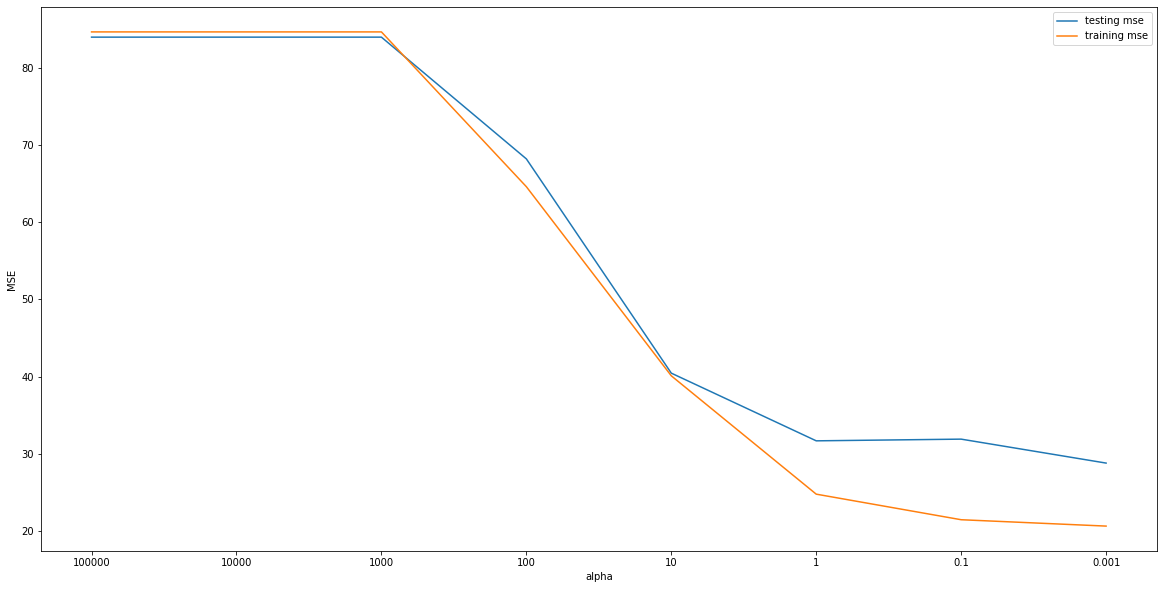

In [34]:
length = range(len(hyperparam_c))

plt.figure(figsize = (20,10))
sns.lineplot(length,testing_mse)
sns.lineplot(length,training_mse)
plt.legend(['testing mse','training mse'])
plt.xlabel('alpha')
plt.ylabel('MSE')
plt.xticks(length,hyperparam_c)
plt.show()


In [35]:
print('best c:',best_c)
print('mse:', score)

best c: 0.001
mse: 28.82051128409872


In [36]:
lassoreg = Lasso(alpha= best_c)
lassoreg.fit(X_train, y_train)

Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [37]:
y_reg_train = lassoreg.predict(X_train)
y_reg_test = lassoreg.predict(X_test)

In [38]:
coef_lassoreg = pd.DataFrame({
    'feature_names':list(X),
    'feature coef': lassoreg.coef_
})

In [39]:
coef_lassoreg

,feature_names,feature coef
0,CRIM,-0.122920
1,ZN,0.027515
2,INDUS,0.038746
3,CHAS,1.655566
4,NOX,-14.470963
5,RM,4.324770
6,AGE,0.001868
7,DIS,-1.248666
8,RAD,0.327883
9,TAX,-0.014347


In [40]:
print('mse train:', mean_squared_error(y_train, y_reg_train))
print('mse test:', mean_squared_error(y_test, y_reg_test))

mse train: 20.664674253173075
mse test: 28.82051128409872


In [41]:
coef_ridgereg

,feature_names,feature coef
0,CRIM,-0.123098
1,ZN,0.027489
2,INDUS,0.040234
3,CHAS,1.676822
4,NOX,-14.800396
5,RM,4.324093
6,AGE,0.002115
7,DIS,-1.253837
8,RAD,0.328548
9,TAX,-0.014321


## Kesimpulan

- saat alpha diset pada High Value, modelnya sangat underfitting, karena baik MSE pada training set maupun test setnya besar, dan itu menunjukkan bahwa modelnya terlalu simple.

- alpha yg lebih rendah dapat mengurangi MSE baik untuk training set maupun test set sampai MSE pada training agak lebih rendah dari MSE pada test set.

- alpha terbaik untuk kasus ini adalah alpha=0.001 dengan MSE 28.82

## Exercise:

Use Ridge Regression and Lasso Regression with different alphas on Admission_predict.csv.  
What is the best alphas for each model? How does the preformance of the models compared with each other?
